In [1]:
pip install scipy==1.11.4

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
# 1. Core Libraries
import numpy as np
import pandas as pd

# 2. Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

# 3. Statistics & Modeling
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf  

# 4. Machine Learning (Scikit-learn)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# 5. XGBoost
import xgboost as xgb
from xgboost import XGBRegressor

# 6. Deep Learning (Keras)
from keras import models, layers

In [4]:
# DATA PROCESSING
    
# Load the dataset and treat specified values as missing (NaN)
df = pd.read_csv('cpi_fyp.csv', na_values=["NA", "N/A", "None", "null", " "])

# Display dataset info
df.info()
df.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150358 entries, 0 to 150357
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Country Name      150358 non-null  object 
 1   Country Code      150358 non-null  int64  
 2   Indicator Name    150358 non-null  object 
 3   Indicator Code    150358 non-null  object 
 4   Time Period       150358 non-null  object 
 5   Value             105815 non-null  float64
 6   Status            0 non-null       float64
 7   Reference Period  68446 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 9.2+ MB


<bound method NDFrame.head of        Country Name  Country Code  \
0         Indonesia           536   
1         Indonesia           536   
2         Indonesia           536   
3         Indonesia           536   
4         Indonesia           536   
...             ...           ...   
150353     Malaysia           548   
150354     Malaysia           548   
150355     Malaysia           548   
150356     Malaysia           548   
150357     Malaysia           548   

                                           Indicator Name Indicator Code  \
0                                   Clothing and footwear       PCPIA_IX   
1                                   Clothing and footwear       PCPIA_IX   
2                                   Clothing and footwear       PCPIA_IX   
3                                   Clothing and footwear       PCPIA_IX   
4                                   Clothing and footwear       PCPIA_IX   
...                                                   ...            

In [5]:
# Drop irrelevant columns
df = df.drop(columns=['Country Code', 'Indicator Code', 'Status', 'Reference Period'])
    
# Keep only rows where 'Indicator Name' is exactly 'Consumer Price Index, All items'
df = df[df['Indicator Name'] == 'Consumer Price Index, All items']
    
# Drop rows with missing 'Value' entries
df = df.dropna(subset=['Value'])
    
# Convert categorical columns to optimize memory usage
df['Country Name'] = df['Country Name'].astype('category')  
df['Indicator Name'] = df['Indicator Name'].astype('category')
    
# Format 'Time Period' for time-series analysis
df['Time Period'] = df['Time Period'].astype(str).apply(lambda x: x + 'M1' if 'M' not in x else x)
df['Time Period'] = pd.to_datetime(df['Time Period'].str.replace('M', '-'), format='%Y-%m')
    
# Display dataset info
df.info()
df.head

<class 'pandas.core.frame.DataFrame'>
Index: 2882 entries, 12 to 150324
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country Name    2882 non-null   category      
 1   Indicator Name  2882 non-null   category      
 2   Time Period     2882 non-null   datetime64[ns]
 3   Value           2882 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(1)
memory usage: 73.7 KB


<bound method NDFrame.head of        Country Name                   Indicator Name Time Period       Value
12        Indonesia  Consumer Price Index, All items  1979-10-01    4.559734
13        Indonesia  Consumer Price Index, All items  1979-11-01    4.589831
14        Indonesia  Consumer Price Index, All items  1979-12-01    4.627452
15        Indonesia  Consumer Price Index, All items  1980-01-01    4.680123
16        Indonesia  Consumer Price Index, All items  1980-02-01    4.747841
...             ...                              ...         ...         ...
150157     Malaysia  Consumer Price Index, All items  2024-04-01  132.400000
150158     Malaysia  Consumer Price Index, All items  2024-08-01  133.200000
150159     Malaysia  Consumer Price Index, All items  2024-06-01  133.000000
150160     Malaysia  Consumer Price Index, All items  2024-09-01  133.200000
150324    Singapore  Consumer Price Index, All items  2024-10-01  116.756000

[2882 rows x 4 columns]>

In [6]:
# Filter for Malaysia
df_msia = df[df["Country Name"] == "Malaysia"]
df_msia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, 17684 to 150160
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country Name    322 non-null    category      
 1   Indicator Name  322 non-null    category      
 2   Time Period     322 non-null    datetime64[ns]
 3   Value           322 non-null    float64       
dtypes: category(2), datetime64[ns](1), float64(1)
memory usage: 8.7 KB


In [7]:
# Calculate mean and median for each indicator
mean_values = df_msia.groupby("Indicator Name")["Value"].mean()
median_values = df_msia.groupby("Indicator Name")["Value"].median()

# Combine results into a single DataFrame
summary_stats = pd.DataFrame({"Mean": mean_values, "Median": median_values})
print(summary_stats)

                                       Mean  Median
Indicator Name                                     
Consumer Price Index, All items  105.002365  104.75


/var/folders/km/kqnqtg953b76gw0hctk94d1m0000gn/T/ipykernel_8469/3705221236.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = df_msia.groupby("Indicator Name")["Value"].mean()
/var/folders/km/kqnqtg953b76gw0hctk94d1m0000gn/T/ipykernel_8469/3705221236.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_values = df_msia.groupby("Indicator Name")["Value"].median()


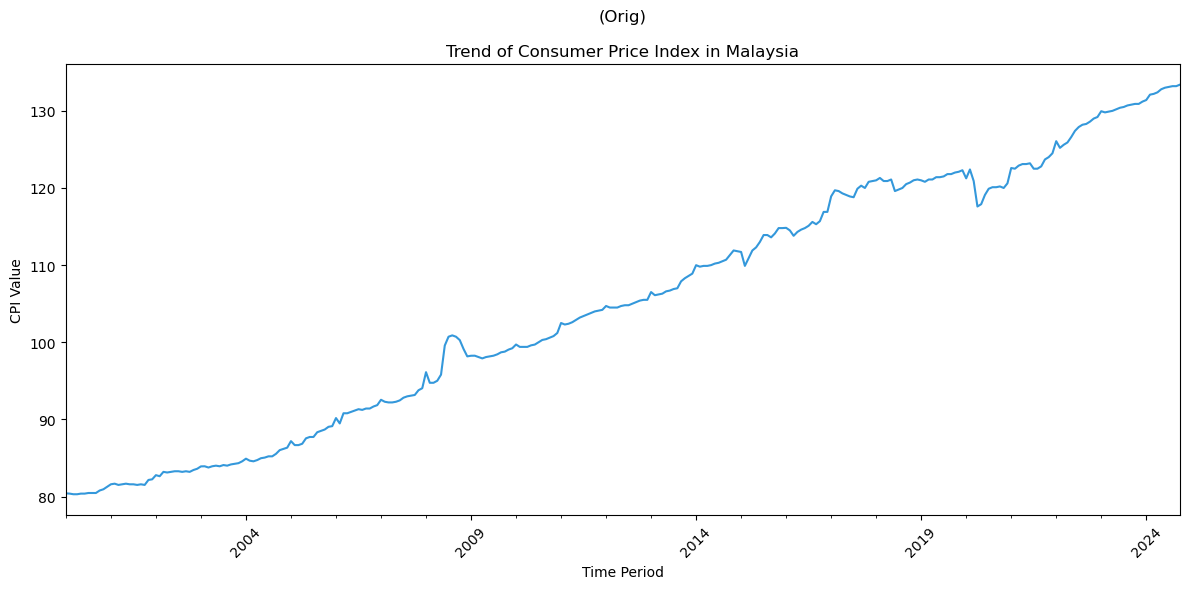

In [8]:
 # Filter for Malaysia
df_msia = df[df["Country Name"] == "Malaysia"]
    
# Group by 'Time Period' and calculate the mean CPI for each period, then plot
plt.figure(figsize=(12, 6))  # Set figure size for better readability
df_msia.groupby("Time Period")["Value"].mean().plot(color='#3498DB', 
                                                        title="(Orig)\n\nTrend of Consumer Price Index in Malaysia", 
                                                        ylabel="CPI Value")
plt.xlabel("Time Period")
plt.xticks(rotation=45)
plt.tight_layout()
    
# Display the plot
plt.show()

In [9]:
 # SVR 



# Filter for Malaysia
df_msia = df[df["Country Name"] == "Malaysia"]
    
# Keep only rows where 'Indicator Name' is exactly 'Consumer Price Index, All items'
df_msia = df_msia[df_msia['Indicator Name'] == 'Consumer Price Index, All items']

In [10]:
# Convert 'Time Period' to a numerical format (e.g., convert to ordinal values)
df_msia['Time Period'] = pd.to_datetime(df_msia['Time Period'])  # Convert to datetime
df_msia['Time Period'] = df_msia['Time Period'].map(lambda x: x.toordinal())  # Convert to numerical format
    
# Drop categorical columns ('Country Name' and 'Indicator Name'), keeping only numerical values
df_msia = df_msia.drop(columns=['Country Name', 'Indicator Name'])

In [11]:
# Define features (X) and target variable (y)
X = df_msia.drop(columns=['Value'])  # Features: Time Period
y = df_msia['Value']  # Target: CPI values


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Standardize the features (SVR is sensitive to feature scaling)
scaler_X = StandardScaler()
scaler_y = StandardScaler()
    
# Reshape y_train and y_test to 2D arrays for scaling
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)
    
# Scale features and target
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)

In [13]:
 # Define parameter grid
param_grid = {
        'kernel': ['rbf', 'poly', 'sigmoid'],  
        'C': [1, 10, 100, 1000],  
        'gamma': ['scale', 'auto', 0.01, 0.1, 1],  
        'epsilon': [0.01, 0.1, 0.2]
    }
    
# Initialize GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train_scaled.ravel())
    
# Extract best parameters and score
best_params = grid_search.best_params_
    
# Best model parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Parameters: {'C': 1000, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}


In [14]:
# Initialize the SVR model
svr = SVR(kernel='rbf', C=1000, gamma='auto', epsilon=0.01)
    
# Train the model
svr.fit(X_train_scaled, y_train_scaled.ravel())
    
# Make predictions on the test set
y_pred_scaled = svr.predict(X_test_scaled)
    
# Inverse transform the predicted and actual values to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_original = scaler_y.inverse_transform(y_test_scaled)

In [15]:
# Calculate MAE, MSE, RMSE, and R²
mae_svr = mean_absolute_error(y_test_original, y_pred)  # Mean Absolute Error
mse_svr = mean_squared_error(y_test_original, y_pred)  # Mean Squared Error
rmse_svr = np.sqrt(mse_svr)  # Root Mean Squared Error
r2_svr = r2_score(y_test_original, y_pred)  # R² (Coefficient of Determination)
    
# Print the results
print(f"Mean Absolute Error (MAE): {mae_svr}")
print(f"Mean Squared Error (MSE): {mse_svr}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr}")
print(f"R² Score: {r2_svr}")

Mean Absolute Error (MAE): 0.6445668711483942
Mean Squared Error (MSE): 0.859445526645531
Root Mean Squared Error (RMSE): 0.9270628493503184
R² Score: 0.9965736142878141


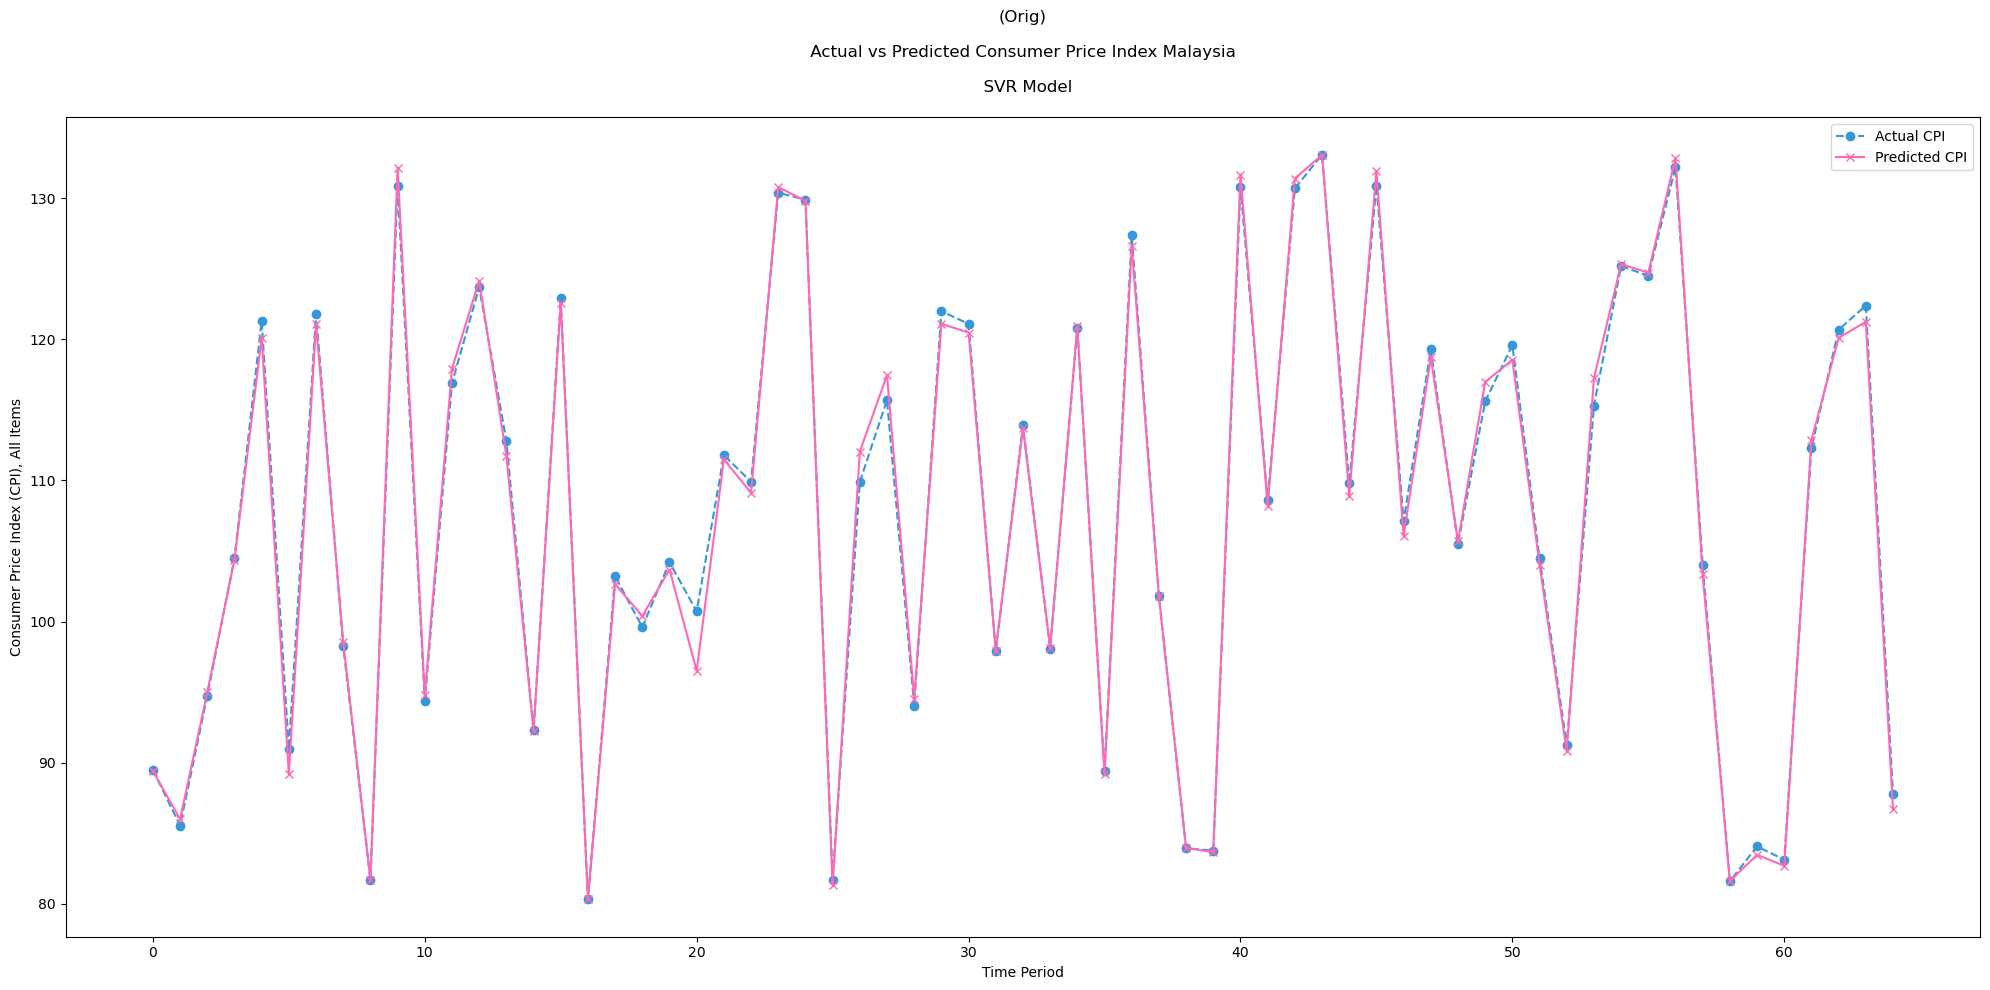

In [16]:
# Plot the predicted vs actual values
plt.figure(figsize=(20, 10))
plt.plot(y_test_original, label="Actual CPI", marker="o", linestyle="--", color="#3498DB")
plt.plot(y_pred, label="Predicted CPI", marker="x", linestyle="-", color="#FF69B4")
plt.legend()
plt.xlabel("Time Period")
plt.ylabel("Consumer Price Index (CPI), All Items")
plt.title("(Orig)\n\n Actual vs Predicted Consumer Price Index Malaysia \n\n  SVR Model\n")
plt.tight_layout()
plt.show()

In [33]:
 # RANDOM FOREST



# Filter for Malaysia
df_msia = df[df["Country Name"] == "Malaysia"]
    
# Keep only rows where 'Indicator Name' is exactly 'Consumer Price Index, All items'
df_msia = df_msia[df_msia['Indicator Name'] == 'Consumer Price Index, All items']
    
# Convert 'Time Period' to a numerical format (e.g., convert to ordinal values)
df_msia['Time Period'] = pd.to_datetime(df_msia['Time Period'])  # Convert to datetime
df_msia['Time Period'] = df_msia['Time Period'].map(lambda x: x.toordinal())  # Convert to numerical format
    
# Drop categorical columns ('Country Name' and 'Indicator Name'), keeping only numerical values
df_msia = df_msia.drop(columns=['Country Name', 'Indicator Name'])

In [35]:
# Define features (X) and target variable (y)
X = df_msia.drop(columns=['Value'])  # Features: Time Period
y = df_msia['Value']  # Target: CPI values
    
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Standardize the features (Random Forest is less sensitive to scaling, but it helps)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Define parameter grid for GridSearchCV
param_grid = {
        "n_estimators": [50, 100, 200],  # Number of trees
        "max_depth": [10, 20, None],  # Depth of trees
        "min_samples_split": [2, 5, 10],  # Minimum samples required to split a node
        "min_samples_leaf": [1, 2, 4]  # Minimum samples required at a leaf node
    }
    
# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring="neg_mean_squared_error", verbose=2, n_jobs=-1)
    
# Train the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train)
    
# Best model parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [41]:
# Train final model with best parameters
rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train_scaled, y_train)
    
# Make predictions
y_pred = rf_model.predict(X_test_scaled)

In [43]:
# Model evaluation
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred)
    
# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R² Score: {r2_rf}")

Mean Absolute Error (MAE): 0.3895919310632949
Mean Squared Error (MSE): 0.3850250118258851
Root Mean Squared Error (RMSE): 0.6205038370758759
R² Score: 0.9984650054500795


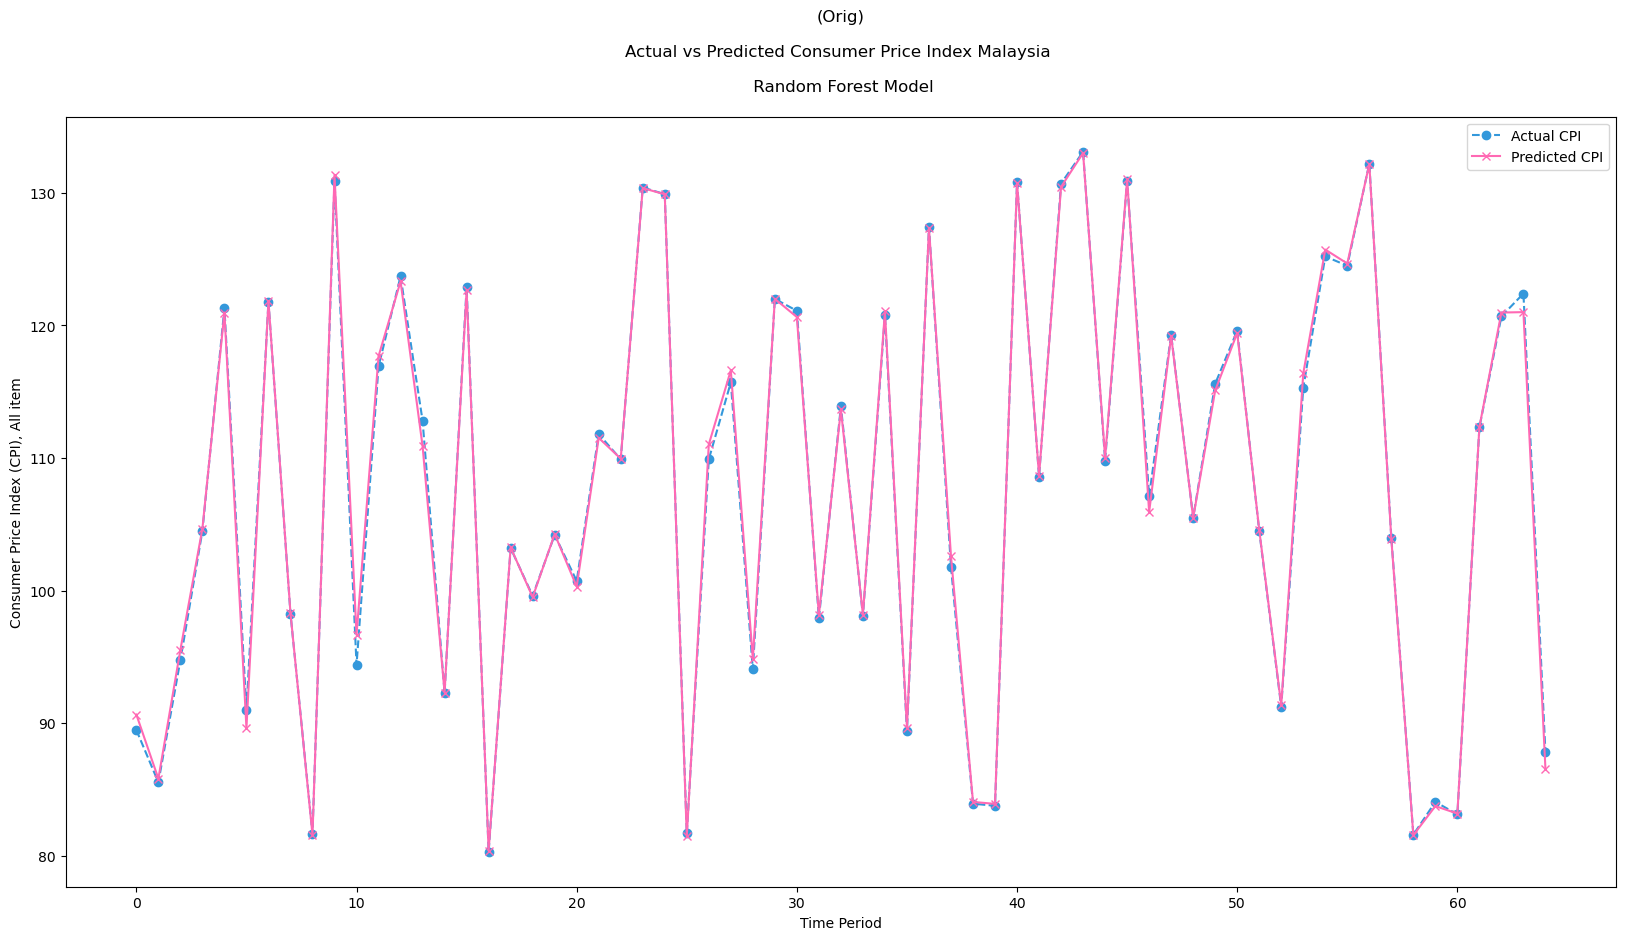

In [45]:
# Plot actual vs predicted CPI
plt.figure(figsize=(20, 10))
plt.plot(y_test.values, label="Actual CPI", marker="o", linestyle="--", color="#3498DB")
plt.plot(y_pred, label="Predicted CPI", marker="x", linestyle="-", color="#FF69B4")
plt.legend()
plt.xlabel("Time Period")
plt.ylabel("Consumer Price Index (CPI), All item")
plt.title("(Orig)\n\nActual vs Predicted Consumer Price Index Malaysia \n\n Random Forest Model\n")
plt.show()

In [47]:
 # XGBOOST



# Filter for Malaysia
df_msia = df[df["Country Name"] == "Malaysia"]
    
# Keep only rows where 'Indicator Name' is exactly 'Consumer Price Index, All items'
df_msia = df_msia[df_msia['Indicator Name'] == 'Consumer Price Index, All items']
    
# Convert 'Time Period' to a numerical format (e.g., convert to ordinal values)
df_msia['Time Period'] = pd.to_datetime(df_msia['Time Period'])  # Convert to datetime
df_msia['Time Period'] = df_msia['Time Period'].map(lambda x: x.toordinal())  # Convert to numerical format
    
# Drop categorical columns ('Country Name' and 'Indicator Name'), keeping only numerical values
df_msia = df_msia.drop(columns=['Country Name', 'Indicator Name'])

In [49]:
# Define features (X) and target variable (y)
X = df_msia.drop(columns=['Value'])  # Features: Time Period
y = df_msia['Value']  # Target: CPI values
    
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Standardize features (important for boosting models as well)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
# Define parameter grid for XGBoost
param_grid_xgb = {
        'n_estimators': [100, 300, 500],  
        'max_depth': [3, 5, 7],  
        'learning_rate': [0.01, 0.05, 0.1],  
        'subsample': [0.8, 1.0],  
        'colsample_bytree': [0.8, 1.0]  
    }
    
# Initialize GridSearchCV with XGBRegressor
grid_search_xgb = GridSearchCV(XGBRegressor(objective="reg:squarederror", random_state=42), 
                                   param_grid_xgb, 
                                   cv=5, scoring="neg_mean_squared_error", verbose=2, n_jobs=-1)
    
# Train the model using GridSearchCV
grid_search_xgb.fit(X_train_scaled, y_train)
    
# Best model parameters
best_params_xgb = grid_search_xgb.best_params_
print(f"Best Parameters for XGBoost: {best_params_xgb}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [55]:
# Train final model using best parameters
xgb_model = xgb.XGBRegressor(**best_params_xgb, objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train_scaled, y_train)
    
# Make predictions
y_pred = xgb_model.predict(X_test_scaled)

In [57]:
# Evaluate performance
mae_xgb = mean_absolute_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred)
    
# Print results
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"R² Score: {r2_xgb}")

Mean Absolute Error (MAE): 0.42082570009915843
Mean Squared Error (MSE): 0.36499004551059894
Root Mean Squared Error (RMSE): 0.604144060229511
R² Score: 0.9985448796482672


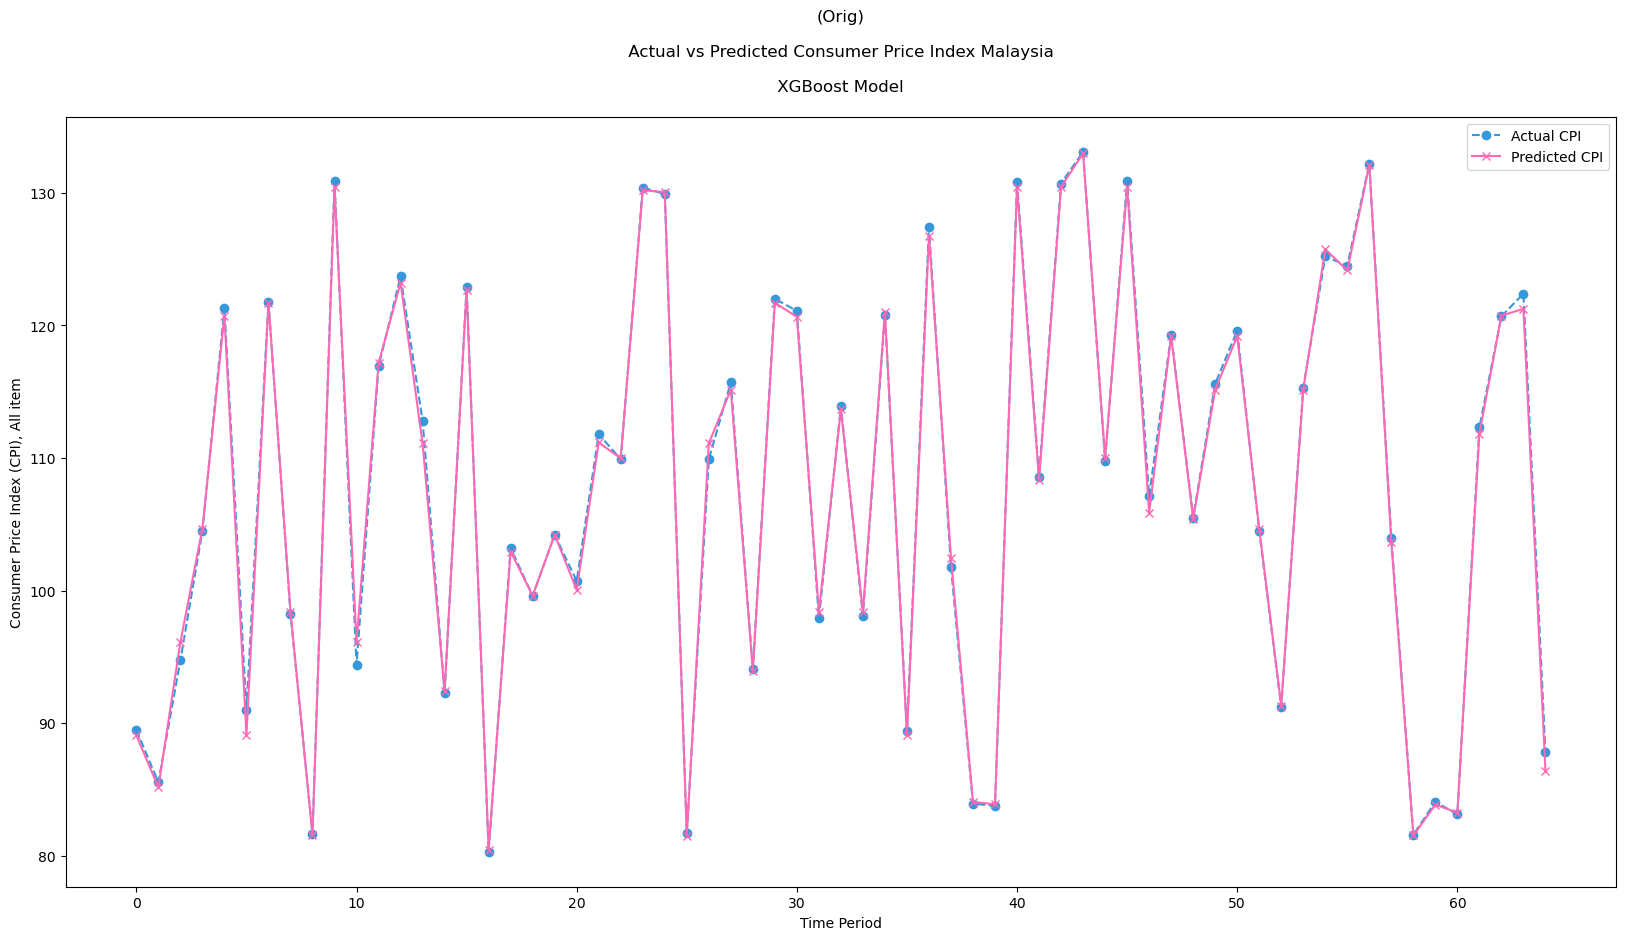

In [59]:
 # Plot actual vs predicted CPI
plt.figure(figsize=(20, 10))
plt.plot(y_test.values, label="Actual CPI", marker="o", linestyle="--", color="#3498DB")
plt.plot(y_pred, label="Predicted CPI", marker="x", linestyle="-", color="#FF69B4")
plt.legend()
plt.xlabel("Time Period")
plt.ylabel("Consumer Price Index (CPI), All item")
plt.title("(Orig)\n\n Actual vs Predicted Consumer Price Index Malaysia \n\n XGBoost Model \n ")
plt.show()

In [61]:
# NEURAL NETWORK



# Filter for Malaysia
df_msia = df[df["Country Name"] == "Malaysia"]
    
# Keep only rows where 'Indicator Name' is exactly 'Consumer Price Index, All items'
df_msia = df_msia[df_msia['Indicator Name'] == 'Consumer Price Index, All items']
    
# Convert 'Time Period' to a numerical format (e.g., convert to ordinal values)
df_msia['Time Period'] = pd.to_datetime(df_msia['Time Period'])  # Convert to datetime
df_msia['Time Period'] = df_msia['Time Period'].map(lambda x: x.toordinal())  # Convert to numerical format
    
# Drop categorical columns ('Country Name' and 'Indicator Name'), keeping only numerical values
df_msia = df_msia.drop(columns=['Country Name', 'Indicator Name'])

In [63]:
# Define features (X) and target variable (y)
X = df_msia.drop(columns=['Value'])  # Features: Time Period
y = df_msia['Value']  # Target: CPI values
    
# Split into training and testing sets
train_data, test_data, train_targets, test_targets = train_test_split(X, y, test_size=0.2, random_state=42)
    
print('Size of the training set: ', train_data.shape)
print('Size of the test set: ', test_data.shape)

Size of the training set:  (257, 1)
Size of the test set:  (65, 1)


In [65]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [69]:
model = models.Sequential()
model.add(layers.Dense(128, # The number of neurons
                          activation = 'relu', # The type of activation
                          input_shape = (1,)  # The input shape. It is only necessary for the layer connected to the input.
                          ))
model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.Dense(1, activation = 'linear'))
model.compile(optimizer = 'rmsprop', loss = 'mse')
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,257 (51.79 KB)

 Trainable params: 13,257 (51.79 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
history = model.fit(train_data, train_targets, epochs = 100, batch_size=16,
                        validation_split= 0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10799.2861 - val_loss: 11618.1943
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10598.5146 - val_loss: 11377.1299
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10349.0723 - val_loss: 11034.4492
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10151.5713 - val_loss: 10583.0225
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9726.4033 - val_loss: 10022.7334
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9025.8730 - val_loss: 9352.1387
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8335.0303 - val_loss: 8574.1035
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7855.0688 - val_loss: 7736.8979
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6554.1689 - val_loss: 6794.4849
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5799.7368 - val_loss: 5797.1855
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4710.8325 - val_loss

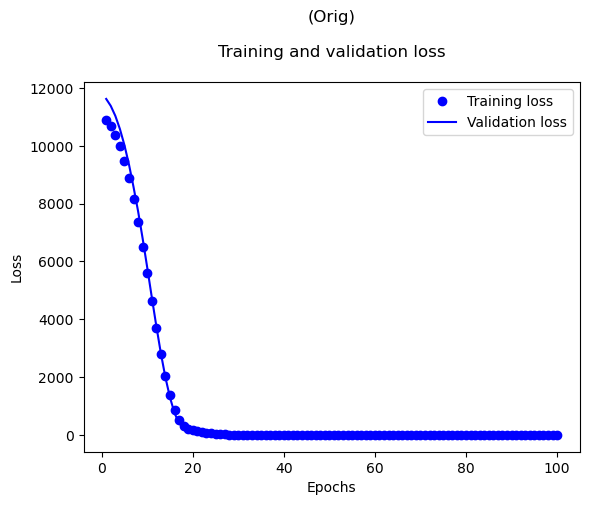

In [73]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('(Orig)\n\nTraining and validation loss\n ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [75]:
model.evaluate(test_data, test_targets)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4324 


1.342078685760498

In [77]:
 model.predict(test_data)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[ 90.41295 ],
       [ 87.0141  ],
       [ 95.20282 ],
       [105.18281 ],
       [118.321175],
       [ 90.20954 ],
       [121.79155 ],
       [ 98.58854 ],
       [ 81.742905],
       [131.70007 ],
       [ 94.99941 ],
       [116.060844],
       [126.13523 ],
       [111.77709 ],
       [ 92.80788 ],
       [124.91376 ],
       [ 80.61166 ],
       [103.181564],
       [100.58323 ],
       [104.38232 ],
       [ 96.60041 ],
       [111.573685],
       [109.76929 ],
       [130.56276 ],
       [129.8789  ],
       [ 81.37435 ],
       [111.9805  ],
       [115.71267 ],
       [ 94.796   ],
       [121.96279 ],
       [119.00612 ],
       [ 97.99144 ],
       [113.16813 ],
       [ 98.188286],
       [120.581474],
       [ 90.20954 ],
       [127.84962 ],
       [102.19079 ],
       [ 84.4526  ],
       [ 84.1211  ],
       [131.24663 ],
       [108.9819  ],
       [131.01619 ],
       [133.67798 ],
       [109.585556],
       [131.46964 ],
       [106.98721 ],
       [116.7

In [79]:
# Make predictions on the test data
predictions = model.predict(test_data)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [81]:
# Calculate evaluation metrics
mae_nn = mean_absolute_error(test_targets, predictions)
mse_nn = mean_squared_error(test_targets, predictions)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(test_targets, predictions)
    
# Print the results
print(f"Mean Absolute Error (MAE): {mae_nn}")
print(f"Mean Squared Error (MSE): {mse_nn}")
print(f"Root Mean Squared Error (RMSE): {rmse_nn}")
print(f"R² Score: {r2_nn}")

Mean Absolute Error (MAE): 0.7540288726442301
Mean Squared Error (MSE): 1.3420775970675383
Root Mean Squared Error (RMSE): 1.1584807279655274
R² Score: 0.9946494857897682


In [83]:
# Define the error metrics for each model
metrics = {
        "Model": ["SVR", "Random Forest", "XGBoost", "Neural Network"],
        "MAE": [mae_svr, mae_rf, mae_xgb, mae_nn],
        "MSE": [mse_svr, mse_rf, mse_xgb, mse_nn],
        "RMSE": [rmse_svr, rmse_rf, rmse_xgb, rmse_nn],
        "R² Score": [r2_svr, r2_rf, r2_xgb, r2_nn]
    }
    
# Create a DataFrame to compare the models
comparison_df = pd.DataFrame(metrics)
    
# Display the comparison table
print(comparison_df)

            Model       MAE       MSE      RMSE  R² Score
0             SVR  0.644567  0.859446  0.927063  0.996574
1   Random Forest  0.389592  0.385025  0.620504  0.998465
2         XGBoost  0.420826  0.364990  0.604144  0.998545
3  Neural Network  0.754029  1.342078  1.158481  0.994649
